# Creating & Optimizing Equity Portfolios (without rebalancing)

## Getting started


__Objectives:__

1. Generate a portfolio with random weights
2. Generate a portfolio with the Highest Risk Adjusted Return (RaR)
3. Generate a portfolio with the Maximum Return
4. Generate the efficient Frontier


__Method 1:__

1. Python assigns random weights from 0-1 for each stock, takes the sum of weights, then divide each weight by the sum to get it's portfolio weight
2. The return is the weight of each stock times the return it generated

   
__Method 2:__

1. We import 'scipy.optimize', for python to optimise what we want, be it the maximum return portfolio, or the one with the lowest risk.
   - We need a constraint function, and a function to input what we want to maximize or minimize



__Learnings from this Project__:
1. When using scipy.optimize, we can consider setting a minimum weight for each stock for each tuple.
   - Otherwise, the portfolio may consist of only 1 stock (in our case TSLA when optimising for maximum return). This rids us of diversification benefits
   - Furthermore, past performance is not indicative of future performance!   

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#5 year past data
start = '2019-09-09'
end = '2024-09-09'
symbol = ['AAPL', 'BA', 'DIS', 'GE', 'JPM', 'MSFT', 'TSLA', 'WMT']
df = yf.download(symbol, start, end ).Close
df

[*********************100%%**********************]  8 of 8 completed


Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-09,53.54,358.78,138.83,44.66,115.40,137.52,15.45,38.78
2019-09-10,54.17,369.49,135.79,45.55,116.87,136.08,15.70,38.68
2019-09-11,55.90,382.94,136.19,46.65,117.19,136.12,16.47,38.67
2019-09-12,55.77,375.63,137.50,46.15,117.91,137.52,16.39,38.97
2019-09-13,54.69,379.76,138.02,46.55,120.23,137.32,16.35,39.14
...,...,...,...,...,...,...,...,...
2024-08-30,229.00,173.74,90.38,174.62,224.80,417.14,214.11,77.23
2024-09-03,222.77,161.02,89.13,164.21,220.30,409.44,210.60,77.17
2024-09-04,220.85,163.22,89.25,166.36,219.33,408.90,219.41,77.24


In [14]:
returns = df.pct_change().dropna()
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-10,0.01,0.03,-0.02,0.02,0.01,-0.01,0.02,-0.00
2019-09-11,0.03,0.04,0.00,0.02,0.00,0.00,0.05,-0.00
2019-09-12,-0.00,-0.02,0.01,-0.01,0.01,0.01,-0.00,0.01
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.00,-0.00,0.00
2019-09-16,0.01,-0.00,-0.02,0.00,-0.01,-0.01,-0.01,-0.02
...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,0.01,0.01,0.01,0.01,0.04,0.01
2024-09-03,-0.03,-0.07,-0.01,-0.06,-0.02,-0.02,-0.02,-0.00
2024-09-04,-0.01,0.01,0.00,0.01,-0.00,-0.00,0.04,0.00


In [16]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2019-09-10 to 2024-09-06
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1257 non-null   float64
 1   BA      1257 non-null   float64
 2   DIS     1257 non-null   float64
 3   GE      1257 non-null   float64
 4   JPM     1257 non-null   float64
 5   MSFT    1257 non-null   float64
 6   TSLA    1257 non-null   float64
 7   WMT     1257 non-null   float64
dtypes: float64(8)
memory usage: 88.4 KB


In [18]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

summary = ann_risk_return(returns.iloc[1:])


In [20]:
summary = ann_risk_return(returns.iloc[1:])
summary

,ann. Risk,CAGR
Ticker,,
AAPL,0.32,0.33
BA,0.51,-0.16
DIS,0.34,-0.08
GE,0.40,0.29
JPM,0.32,0.13
MSFT,0.30,0.24
TSLA,0.66,0.68
WMT,0.22,0.15


## Creating Random Portfolios (Part 1)

In [22]:
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-10,0.01,0.03,-0.02,0.02,0.01,-0.01,0.02,-0.00
2019-09-11,0.03,0.04,0.00,0.02,0.00,0.00,0.05,-0.00
2019-09-12,-0.00,-0.02,0.01,-0.01,0.01,0.01,-0.00,0.01
2019-09-13,-0.02,0.01,0.00,0.01,0.02,-0.00,-0.00,0.00
2019-09-16,0.01,-0.00,-0.02,0.00,-0.01,-0.01,-0.01,-0.02
...,...,...,...,...,...,...,...,...
2024-08-30,-0.00,0.01,0.01,0.01,0.01,0.01,0.04,0.01
2024-09-03,-0.03,-0.07,-0.01,-0.06,-0.02,-0.02,-0.02,-0.00
2024-09-04,-0.01,0.01,0.00,0.01,-0.00,-0.00,0.04,0.00


In [24]:
noa = len(returns.columns) # number of assets
noa

8

In [26]:
nop = 10000 # number of random portfolios
nop

10000

In [28]:
# 80,000 random floats between 0 and 1
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

In [30]:
matrix

array([[0.69646919, 0.28613933, 0.22685145, ..., 0.42310646, 0.9807642 ,
        0.68482974],
       [0.4809319 , 0.39211752, 0.34317802, ..., 0.0596779 , 0.39804426,
        0.73799541],
       [0.18249173, 0.17545176, 0.53155137, ..., 0.84943179, 0.72445532,
        0.61102351],
       ...,
       [0.1412533 , 0.28570045, 0.56403074, ..., 0.34359409, 0.87588094,
        0.78291379],
       [0.1896295 , 0.45365639, 0.82695243, ..., 0.91009298, 0.92561585,
        0.38263481],
       [0.84641632, 0.3538014 , 0.67855546, ..., 0.40234825, 0.42038566,
        0.91972547]])

In [32]:
matrix.shape

(10000, 8)

In [34]:
matrix.sum(axis = 1, keepdims= True)

array([[4.56894411],
       [3.57956695],
       [4.24063404],
       ...,
       [3.82262761],
       [4.93698499],
       [3.99183794]])

In [36]:
weights = matrix / matrix.sum(axis = 1, keepdims= True) # make portfolio weights summing up to 1
weights

weights = matrix/matrix.sum(axis =1).reshape(10000,1)

In [40]:
w1 = weights[0,::]
w1

array([0.15243548, 0.06262702, 0.04965074, 0.12066568, 0.15746942,
       0.09260487, 0.21465883, 0.14988797])

__Weights are initial weights. No rebalancing thereafter.__

In [43]:
returns.add(1).cumprod().mul(w1).sum(axis = 1) # weighted average investment multiple over time

Date
2019-09-10   1.01
2019-09-11   1.03
2019-09-12   1.03
2019-09-13   1.03
2019-09-16   1.03
             ... 
2024-08-30   5.05
2024-09-03   4.94
2024-09-04   5.06
2024-09-05   5.20
2024-09-06   4.91
Length: 1257, dtype: float64

In [46]:
port1 = returns.add(1).cumprod().dot(w1) # alternatively: dot product
port1

Date
2019-09-10   1.01
2019-09-11   1.03
2019-09-12   1.03
2019-09-13   1.03
2019-09-16   1.03
             ... 
2024-08-30   5.05
2024-09-03   4.94
2024-09-04   5.06
2024-09-05   5.20
2024-09-06   4.91
Length: 1257, dtype: float64

In [48]:
initial_w = returns.add(1).cumprod().mul(w1).iloc[0]
initial_w

Ticker
AAPL   0.15
BA     0.06
DIS    0.05
GE     0.12
JPM    0.16
MSFT   0.09
TSLA   0.22
WMT    0.15
Name: 2019-09-10 00:00:00, dtype: float64

In [50]:
final_w = returns.add(1).cumprod().mul(w1).iloc[-1]
final_w

final_w / final_w.sum()

Ticker
AAPL   0.13
BA     0.01
DIS    0.01
GE     0.09
JPM    0.06
MSFT   0.06
TSLA   0.60
WMT    0.06
Name: 2024-09-06 00:00:00, dtype: float64

-> __no active rebalancing__! __Weights deviate__ from initial/target weights as prices move. <br>
-> weights of __outperforming__ (underperforming) Stocks __increase__ (decrease) over time. (__Momentum Trading Strategy__)


In [53]:
ann_risk_return((port1 / port1.shift() - 1).to_frame())

,ann. Risk,CAGR
0,0.46,0.37


## Creating Random Portfolios (Part 2)

__many Portfolios__

In [58]:
weights

array([[0.15243548, 0.06262702, 0.04965074, ..., 0.09260487, 0.21465883,
        0.14988797],
       [0.13435477, 0.10954328, 0.09587138, ..., 0.01667182, 0.111199  ,
        0.20616891],
       [0.04303407, 0.04137394, 0.12534715, ..., 0.20030773, 0.17083656,
        0.14408777],
       ...,
       [0.03695189, 0.07473928, 0.14755053, ..., 0.08988427, 0.22913059,
        0.20481037],
       [0.03840998, 0.09188936, 0.16750151, ..., 0.18434186, 0.18748606,
        0.07750374],
       [0.21203674, 0.0886312 , 0.16998572, ..., 0.10079273, 0.10531131,
        0.2304015 ]])

In [60]:
ports = returns.add(1).cumprod().dot(weights.T)
ports # normalized prices for 10,000 portfolios

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-10,1.01,1.01,1.00,1.00,1.01,1.01,1.01,1.01,1.00,1.01,...,1.01,1.00,1.01,1.00,1.01,1.01,1.00,1.01,1.00,1.00
2019-09-11,1.03,1.03,1.02,1.02,1.03,1.02,1.03,1.02,1.01,1.03,...,1.04,1.02,1.02,1.02,1.03,1.04,1.02,1.03,1.02,1.02
2019-09-12,1.03,1.03,1.02,1.02,1.03,1.02,1.03,1.02,1.01,1.03,...,1.04,1.02,1.02,1.02,1.03,1.03,1.02,1.03,1.02,1.02
2019-09-13,1.03,1.03,1.03,1.02,1.03,1.03,1.03,1.03,1.01,1.03,...,1.04,1.03,1.03,1.02,1.03,1.04,1.02,1.03,1.03,1.02
2019-09-16,1.03,1.02,1.02,1.01,1.02,1.02,1.03,1.02,1.01,1.03,...,1.03,1.02,1.02,1.01,1.02,1.03,1.01,1.02,1.02,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,5.05,3.73,4.33,2.92,4.79,3.86,3.62,3.53,2.80,2.96,...,4.92,4.60,2.61,3.72,5.67,4.70,3.00,4.97,4.24,3.63
2024-09-03,4.94,3.63,4.24,2.85,4.69,3.78,3.51,3.45,2.74,2.88,...,4.79,4.50,2.56,3.63,5.57,4.59,2.94,4.86,4.15,3.55
2024-09-04,5.06,3.70,4.34,2.86,4.81,3.84,3.57,3.52,2.75,2.90,...,4.91,4.62,2.59,3.69,5.75,4.71,2.97,5.00,4.26,3.61


In [62]:
port_ret = ports.pct_change().dropna()
port_ret # simple returns

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-11,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.01,0.02,...,0.03,0.02,0.01,0.01,0.03,0.02,0.01,0.02,0.02,0.02
2019-09-12,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00
2019-09-13,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.01,-0.00,0.00,0.00,-0.00
2019-09-16,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.00,-0.01,-0.01,-0.00,...,-0.00,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01
2019-09-17,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,...,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-30,0.02,0.02,0.02,0.01,0.03,0.02,0.02,0.02,0.01,0.01,...,0.02,0.03,0.02,0.02,0.03,0.03,0.01,0.03,0.03,0.02
2024-09-03,-0.02,-0.03,-0.02,-0.02,-0.02,-0.02,-0.03,-0.02,-0.02,-0.03,...,-0.03,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02,-0.02
2024-09-04,0.02,0.02,0.02,0.00,0.03,0.02,0.02,0.02,0.00,0.01,...,0.02,0.03,0.01,0.02,0.03,0.03,0.01,0.03,0.03,0.02


In [63]:
port_summary = ann_risk_return(port_ret)
port_summary

,ann. Risk,CAGR
0,0.46,0.37
1,0.39,0.29
2,0.44,0.33
3,0.28,0.23
4,0.47,0.36
...,...,...
9995,0.48,0.35
9996,0.33,0.24
9997,0.48,0.37
9998,0.46,0.33


In [66]:
summary

,ann. Risk,CAGR
Ticker,,
AAPL,0.32,0.33
BA,0.51,-0.16
DIS,0.34,-0.08
GE,0.40,0.29
JPM,0.32,0.13
MSFT,0.30,0.24
TSLA,0.66,0.68
WMT,0.22,0.15


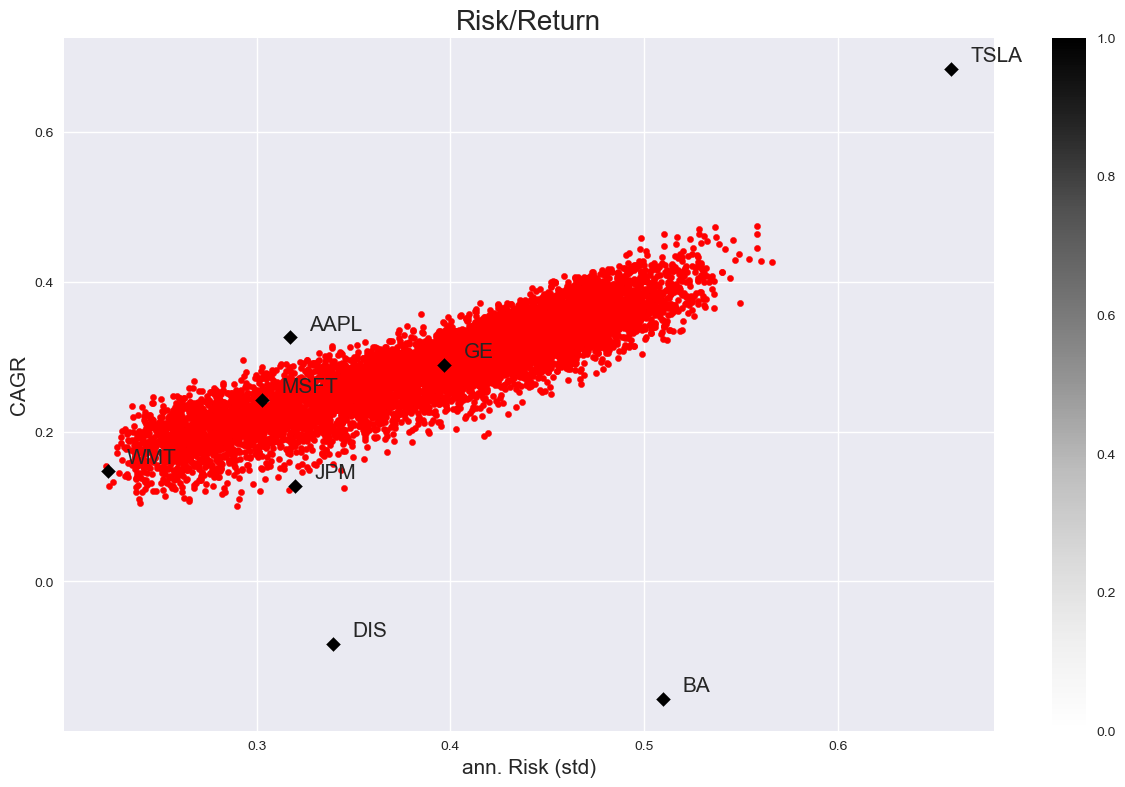

In [68]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"],s= 20, color = "red")
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"], s= 50, color = "black", marker = "D")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)

plt.colorbar()

plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()


## Performance Measurement: Risk-adjusted Return

In [73]:
summary["RaR"] = summary["CAGR"].div(summary["ann. Risk"])
summary

,ann. Risk,CAGR,RaR
Ticker,,,
AAPL,0.32,0.33,1.03
BA,0.51,-0.16,-0.31
DIS,0.34,-0.08,-0.25
GE,0.40,0.29,0.73
JPM,0.32,0.13,0.40
MSFT,0.30,0.24,0.80
TSLA,0.66,0.68,1.04
WMT,0.22,0.15,0.66


In [75]:
port_summary["RaR"] = port_summary["CAGR"].div(port_summary["ann. Risk"])
port_summary

,ann. Risk,CAGR,RaR
0,0.46,0.37,0.80
1,0.39,0.29,0.75
2,0.44,0.33,0.76
3,0.28,0.23,0.81
4,0.47,0.36,0.77
...,...,...,...
9995,0.48,0.35,0.73
9996,0.33,0.24,0.72
9997,0.48,0.37,0.77
9998,0.46,0.33,0.71


In [77]:
port_summary.sort_values("RaR")

,ann. Risk,CAGR,RaR
485,0.29,0.10,0.35
1451,0.35,0.13,0.36
4707,0.29,0.11,0.38
510,0.32,0.12,0.39
6266,0.30,0.12,0.40
...,...,...,...
7822,0.25,0.24,0.97
4496,0.24,0.23,0.99
1125,0.25,0.25,1.00
5350,0.27,0.27,1.00


In [79]:
vmin = port_summary.RaR.min()
vmin

0.3462562360329433

In [81]:
vmax = port_summary.RaR.max()
vmax

1.0094542539811926

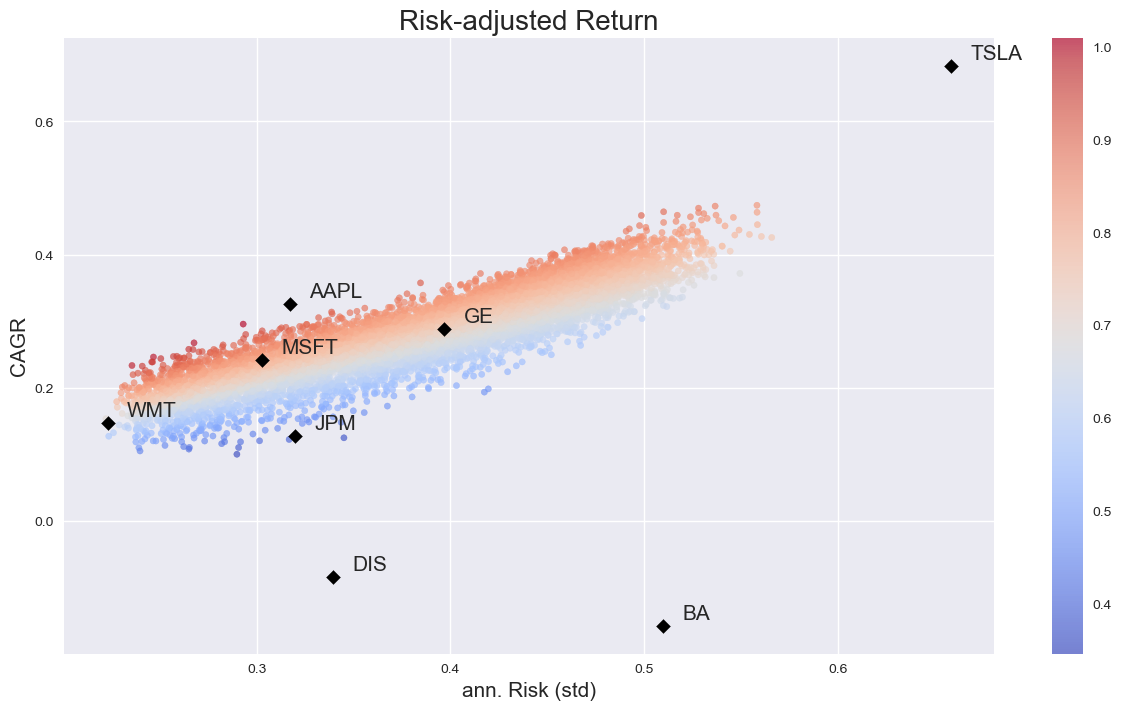

In [83]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("Risk-adjusted Return", fontsize = 20)
plt.show()

## Portfolio Optimization

__Note: We are optimizing the past here (backward looking)!__

In [88]:
import scipy.optimize as sco
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress = True)

import scipy.optimize as sco


In [89]:
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-10,0.0118,0.0299,-0.0219,0.0201,0.0127,-0.0105,0.0162,-0.0024
2019-09-11,0.0318,0.0364,0.0029,0.0241,0.0027,0.0003,0.0491,-0.0003
2019-09-12,-0.0022,-0.0191,0.0096,-0.0107,0.0061,0.0103,-0.0050,0.0078
2019-09-13,-0.0195,0.0110,0.0038,0.0086,0.0197,-0.0015,-0.0027,0.0044
2019-09-16,0.0053,-0.0024,-0.0161,0.0043,-0.0089,-0.0072,-0.0097,-0.0158
...,...,...,...,...,...,...,...,...
2024-08-30,-0.0034,0.0086,0.0063,0.0060,0.0117,0.0097,0.0380,0.0106
2024-09-03,-0.0272,-0.0732,-0.0138,-0.0596,-0.0200,-0.0185,-0.0164,-0.0008
2024-09-04,-0.0086,0.0137,0.0013,0.0131,-0.0044,-0.0013,0.0418,0.0009


In [92]:
#calculate portfolio CAGR (based on weights)
def port_ret(weights):
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change() 
    # simple_ret = returns.add(1).cumprod().mul(weights).sum(axis = 1) # same thing
    log_returns = np.log(simple_ret + 1)
    cagr = np.exp(log_returns.mean() * 252) - 1
    return cagr

In [94]:
#calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change()
        # simple_ret = returns.add(1).cumprod().mul(weights).sum(axis = 1) # same thing
    return simple_ret.std()*np.sqrt(252)

In [184]:
#define function to be minimized (sco only supports minimize, not maximize)
#-> maximize RaR == minimize RaR * (-1)
def min_func_RaR(weights): 
     return -(port_ret(weights)) / port_vol(weights) #Risk-adjusted Return * (-1)


In [98]:
#number of assets
noa = len(returns.columns)
noa



8

In [101]:
#equal weights (starting point of optimization)
eweigths = np.full(noa, 1/noa)
eweigths




array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [103]:
#constraint: weights must sum up to 1 -> sum of weights - 1 = 0
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})



In [105]:
#bounds: all weights shall be between 0 and 1 -> can be changed
bnds =  tuple((0, 1) for x in range(noa))
bnds



((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [107]:
#run optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints
opts = sco.minimize(min_func_RaR, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)



In [108]:
#output of optimization
opts



 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0903724711295941
       x: [ 3.346e-01  8.925e-17  0.000e+00  2.926e-01  1.129e-17
            1.724e-04  4.523e-03  3.681e-01]
     nit: 18
     jac: [-1.573e-04  9.885e-01  6.594e-01  1.517e-04  2.874e-01
            3.297e-03  2.247e-03 -7.123e-06]
    nfev: 170
    njev: 18

In [109]:
#getting the optimal weights
optimal_weights = opts["x"]
optimal_weights

array([0.3345932 , 0.        , 0.        , 0.29262544, 0.        ,
       0.00017245, 0.00452311, 0.36808579])

In [110]:
pd.Series(data = optimal_weights, index = returns.columns).sort_values(ascending = False).head(20)



Ticker
WMT    0.3681
AAPL   0.3346
GE     0.2926
TSLA   0.0045
MSFT   0.0002
BA     0.0000
JPM    0.0000
DIS    0.0000
dtype: float64

-> __Optimization (without bounds) does not necessarily lead to practical/factual diversification.__

In [112]:
#cagr of the optimal portfolio
cagr_opt = port_ret(optimal_weights)
cagr_opt

0.26263338686469906

In [113]:
#volatility of the optimal portfolio
vol_opt = port_vol(optimal_weights)
vol_opt

0.2408657535095494

In [120]:
#RaR of the optimal portfolio
RaR_opt = -min_func_RaR(optimal_weights)
RaR_opt

1.0903724711295941

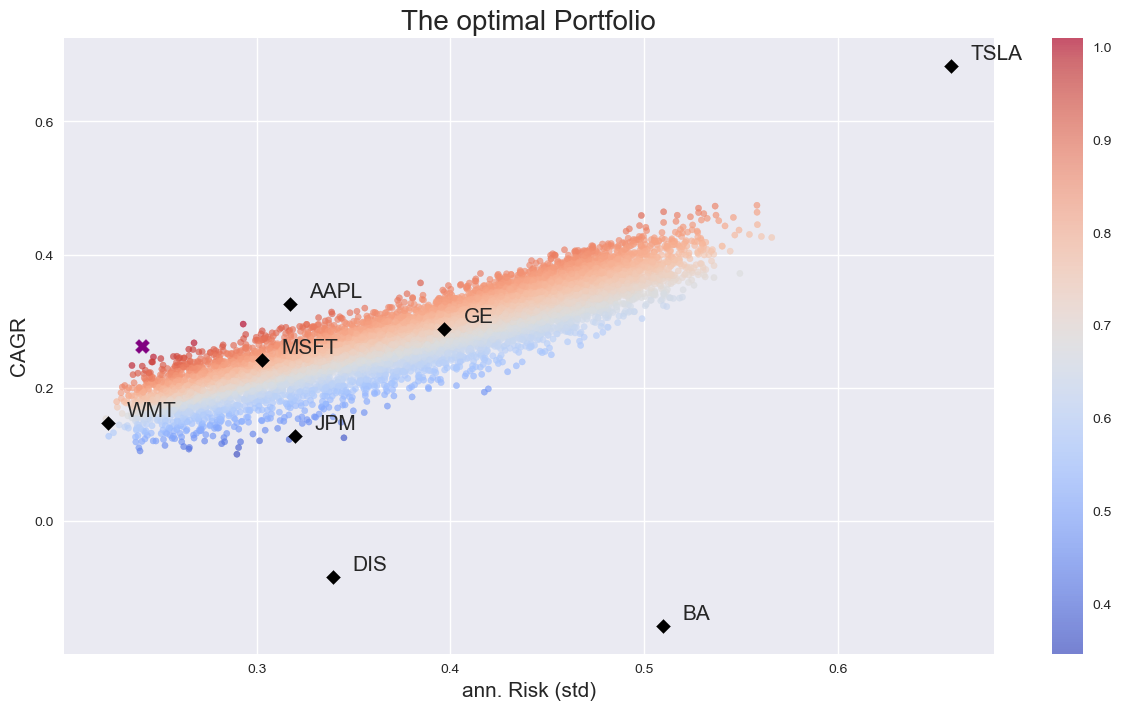

In [121]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.scatter(x = vol_opt, y = cagr_opt, s = 100, marker = "X", c = "purple") # best Portfolio
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The optimal Portfolio", fontsize = 20)
plt.show()

__Reminder: We are optimizing the past here (backward looking).__ <br>
-> Very unlikely we had selected this optimal portfolio back in 2017 (__look ahead bias__)! <br>
-> Very unlikely this will be the optimal portfolio in the future (__past performance is not a good indicator for future performance__)!

## Minimum Variance Portfolio

(use code above with following replacements:)

In [128]:
# Minimum Variance Portfolio
opts = sco.minimize(port_vol, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)

## Maximum Return Portfolio

(use code above with following replacements:)

In [133]:
#calculate portfolio CAGR (based on weights)
def port_ret(weights):
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change()
    log_returns = np.log(simple_ret + 1)
    cagr = np.exp(log_returns.mean() * 252) - 1
    return cagr * (-1)



In [134]:
# Maximum Return Portfolio
opts = sco.minimize(port_ret, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)



In [136]:
#cagr of the optimal portfolio
cagr_opt = -port_ret(optimal_weights)
cagr_opt

cagr_opt = -port_ret(optimal_weights)

## The Efficient Frontier

__Idea: Find for each return level the portfolio with the lowest volatility.__

In [142]:
returns

Ticker,AAPL,BA,DIS,GE,JPM,MSFT,TSLA,WMT
Date,,,,,,,,
2019-09-10,0.0118,0.0299,-0.0219,0.0201,0.0127,-0.0105,0.0162,-0.0024
2019-09-11,0.0318,0.0364,0.0029,0.0241,0.0027,0.0003,0.0491,-0.0003
2019-09-12,-0.0022,-0.0191,0.0096,-0.0107,0.0061,0.0103,-0.0050,0.0078
2019-09-13,-0.0195,0.0110,0.0038,0.0086,0.0197,-0.0015,-0.0027,0.0044
2019-09-16,0.0053,-0.0024,-0.0161,0.0043,-0.0089,-0.0072,-0.0097,-0.0158
...,...,...,...,...,...,...,...,...
2024-08-30,-0.0034,0.0086,0.0063,0.0060,0.0117,0.0097,0.0380,0.0106
2024-09-03,-0.0272,-0.0732,-0.0138,-0.0596,-0.0200,-0.0185,-0.0164,-0.0008
2024-09-04,-0.0086,0.0137,0.0013,0.0131,-0.0044,-0.0013,0.0418,0.0009


In [144]:
#calculate portfolio CAGR (based on weights)
def port_ret(weights):
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change()
    log_returns = np.log(simple_ret + 1)
    cagr = np.exp(log_returns.mean() * 252) - 1
    return cagr

In [146]:
#calculate annualized portfolio volatility (based on weights)
def port_vol(weights):
    simple_ret = returns.add(1).cumprod().dot(weights.T).pct_change()
    return simple_ret.std() * np.sqrt(252)

In [148]:
noa = len(returns.columns)
noa

8

In [150]:
#equal weights (starting point of optimization)
eweigths = np.full(noa, 1/noa)
eweigths

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [152]:
summary

,ann. Risk,CAGR,RaR
Ticker,,,
AAPL,0.3171,0.3257,1.0269
BA,0.5097,-0.1571,-0.3082
DIS,0.3395,-0.0835,-0.2459
GE,0.3968,0.2886,0.7274
JPM,0.3198,0.1274,0.3984
MSFT,0.3030,0.2426,0.8006
TSLA,0.6588,0.6837,1.0379
WMT,0.2230,0.1470,0.6593


In [154]:
tcagrs = np.linspace(summary.CAGR.min(), summary.CAGR.max(), 100)
tcagrs # evenly spaced target returns between min and max

array([-0.15711939, -0.1486261 , -0.14013281, -0.13163952, -0.12314623,
       -0.11465294, -0.10615966, -0.09766637, -0.08917308, -0.08067979,
       -0.0721865 , -0.06369321, -0.05519992, -0.04670663, -0.03821334,
       -0.02972005, -0.02122676, -0.01273347, -0.00424019,  0.0042531 ,
        0.01274639,  0.02123968,  0.02973297,  0.03822626,  0.04671955,
        0.05521284,  0.06370613,  0.07219942,  0.08069271,  0.089186  ,
        0.09767928,  0.10617257,  0.11466586,  0.12315915,  0.13165244,
        0.14014573,  0.14863902,  0.15713231,  0.1656256 ,  0.17411889,
        0.18261218,  0.19110547,  0.19959875,  0.20809204,  0.21658533,
        0.22507862,  0.23357191,  0.2420652 ,  0.25055849,  0.25905178,
        0.26754507,  0.27603836,  0.28453165,  0.29302494,  0.30151822,
        0.31001151,  0.3185048 ,  0.32699809,  0.33549138,  0.34398467,
        0.35247796,  0.36097125,  0.36946454,  0.37795783,  0.38645112,
        0.39494441,  0.40343769,  0.41193098,  0.42042427,  0.42

In [156]:
# portfolio return == tcagr
cons = ({"type": "eq", "fun": lambda x: port_ret(x) - tcagr},
       {"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [158]:
bnds =  tuple((0, 1) for x in range(noa))
bnds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [160]:
vols = []

In [162]:
#for each target return, find the portfolio with the lowest volatility
for tcagr in tcagrs:
    res = sco.minimize(port_vol, eweigths, method = "SLSQP", bounds = bnds, constraints = cons)
    vols.append(res["fun"])
vols = np.array(vols)

In [163]:
vols

array([0.509736  , 0.45664874, 0.41467658, 0.38244709, 0.35895373,
       0.34333945, 0.33368454, 0.32471648, 0.31586385, 0.30715007,
       0.29860003, 0.29024009, 0.28209796, 0.27420267, 0.26658442,
       0.25927435, 0.25230432, 0.24570652, 0.23951308, 0.23375552,
       0.22846417, 0.22366744, 0.2193911 , 0.21565747, 0.21239802,
       0.20945381, 0.20678655, 0.20439539, 0.20228326, 0.20044933,
       0.19889634, 0.19761705, 0.19658207, 0.19573867, 0.19507311,
       0.19467635, 0.19456106, 0.1947259 , 0.1951689 , 0.19588662,
       0.19688255, 0.19842656, 0.20062723, 0.20343769, 0.20694965,
       0.2115172 , 0.21701507, 0.22328916, 0.23019956, 0.23761515,
       0.24542823, 0.25354752, 0.26187473, 0.27032512, 0.27882789,
       0.28732499, 0.29576893, 0.30412348, 0.31291416, 0.32256223,
       0.3326334 , 0.34285445, 0.35306118, 0.3634837 , 0.37420966,
       0.38507372, 0.39595791, 0.40677866, 0.41747747, 0.42801415,
       0.43836174, 0.44850307, 0.45842802, 0.46813172, 0.47761

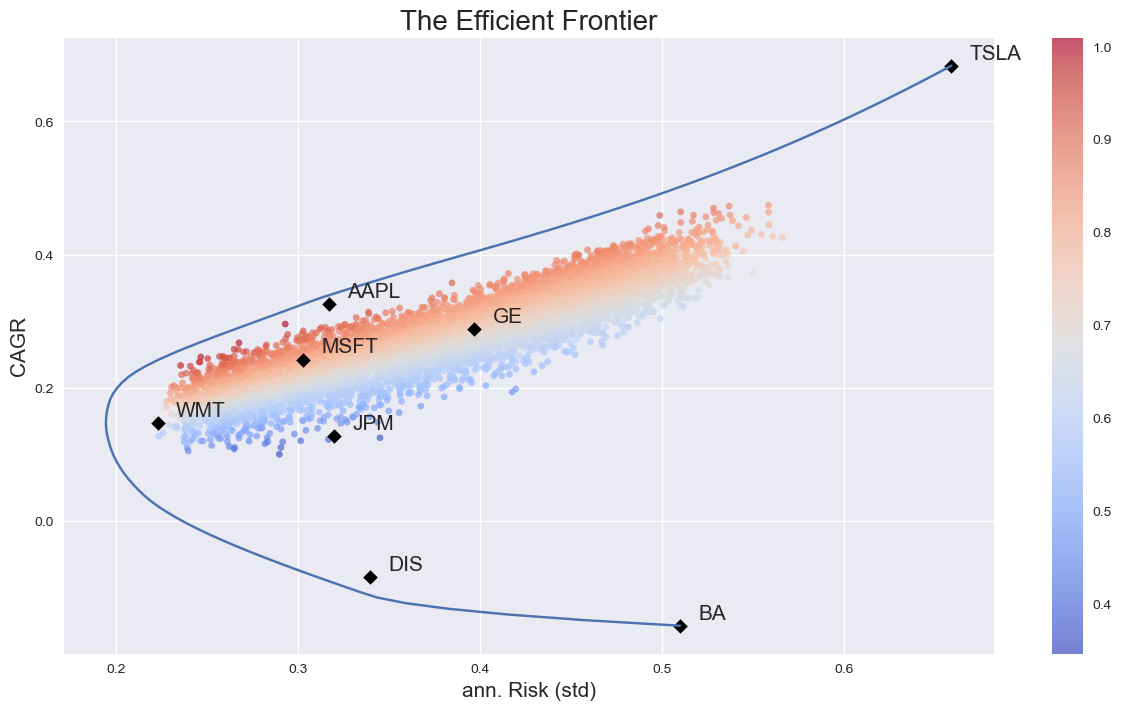

In [164]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "ann. Risk"], port_summary.loc[:, "CAGR"], s= 20, 
            c = port_summary.loc[:, "RaR"], cmap = "coolwarm", vmin = vmin, vmax = vmax, alpha = 0.66)
plt.colorbar()
plt.scatter(summary.loc[:, "ann. Risk"], summary.loc[:, "CAGR"],s= 50, marker = "D", c = "black")
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann. Risk"]+0.01, summary.loc[i, "CAGR"]+0.01), size = 15)
plt.plot(vols, tcagrs) # efficient frontier
plt.xlabel("ann. Risk (std)", fontsize = 15)
plt.ylabel("CAGR", fontsize = 15)
plt.title("The Efficient Frontier", fontsize = 20)
plt.show()